In [178]:
import pandas as pd
import numpy as np
import os
import plotly.graph_objects as go

# Diving into the meaning of the inflation rate (Q & A session).

Q : Simple question : What does an inflation rate means, for which time resolution ? 

A :
Summary:
- The inflation rate is a monthly metric. For each month we compare the YoY percentage change of the price index (which is based on a typical basket of goods and services).
- The annual inflation is the mean of these YoY percentage change over a given year.

Takeaway:
- When we say that in 2024 the inflation rate was 2% it means that in average the monthly percentage change Year over Year of the price index was 2%. In other words, in average the monthly year over year comparison of the typical basket of prices was 2% higher in 2024. 

In [264]:
#os.listdir('./Datasets/famille_IPC-2015_03092025')

In [231]:
month_ls = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [180]:
%%capture

# Data Loading and Formatting

df = pd.read_csv('./Datasets/famille_IPC-2015_03092025/valeurs_mensuelles.csv', on_bad_lines='skip',  sep=';')

# df['idBank'] = df['idBank'].astype(str)

df = df.drop(df[df['Libellé'] == 'Codes'].index).reset_index(drop=True)

df = df.set_index(['Libellé'])

df = df.drop(columns = ['idBank', 'Dernière mise à jour', 'Période']) # 'idBank'

df = df.astype(float)

In [224]:
df_annual = pd.read_csv('./Datasets/famille_IPC-2015_03092025/valeurs_annuelles.csv', on_bad_lines='skip',  sep=';')

df_annual = df_annual.drop(df_annual[df_annual['Libellé'] == 'Codes'].index).reset_index(drop=True)

df_annual = df_annual.set_index(['Libellé'])

df_annual = df_annual.drop(columns = ['idBank', 'Dernière mise à jour', 'Période']) # 'idBank'

df_annual = df_annual.astype(float)

INSEE's Landing page Screenshot to match the communicated inflation rate to the correct data index.

<img src="./Captures/Capture d’écran 2025-09-03 231836.png" alt="Description" width="500" height="300">

The communicated rate is a Year over Year mensual rate. 

We can read the rate as follow : the prices of August 2025 are 0.9% higher than those from August 2024.

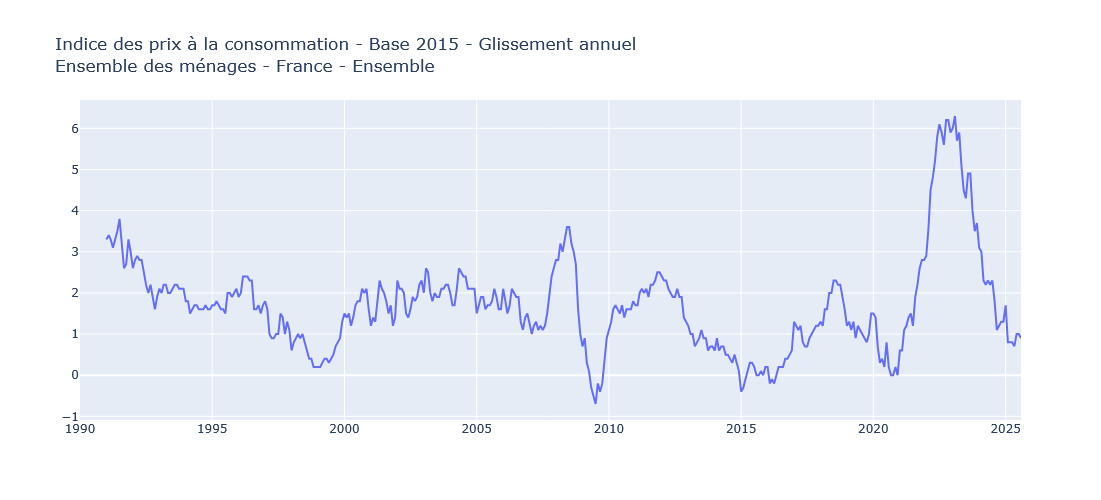

In [189]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.loc['Indice des prix à la consommation - Base 2015 - Glissement annuel - Ensemble des ménages - France - Ensemble'].index,  
                         y = df.loc['Indice des prix à la consommation - Base 2015 - Glissement annuel - Ensemble des ménages - France - Ensemble']
                        )
             )

fig.update_layout(width=1000, height=500, 
                  title='Indice des prix à la consommation - Base 2015 - Glissement annuel <br>Ensemble des ménages - France - Ensemble',
                  
                 )

fig.show()

We would like to recompute this rate from the actual index.

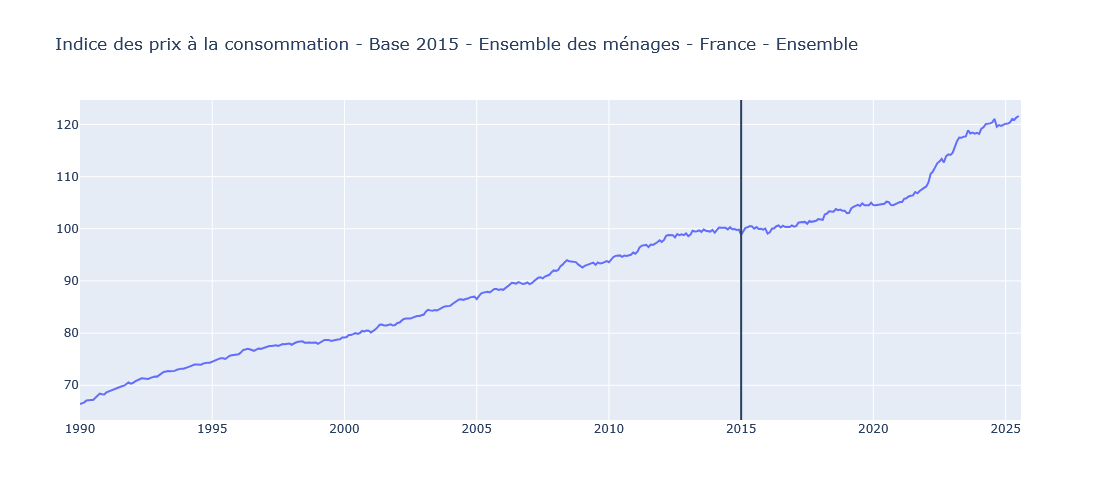

In [196]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.loc['Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble'].iloc[0].index,  
                         y = df.loc['Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble'].iloc[0]
                        )
             )

fig.update_layout(width=1000, height=500, 
                  title=' Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble',
                  
                 )

fig.add_vline('2015-01')

fig.show()

In [208]:
serie_ipc_YoY_change = df.loc['Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble'].iloc[1].pct_change(periods=12).dropna() * 100

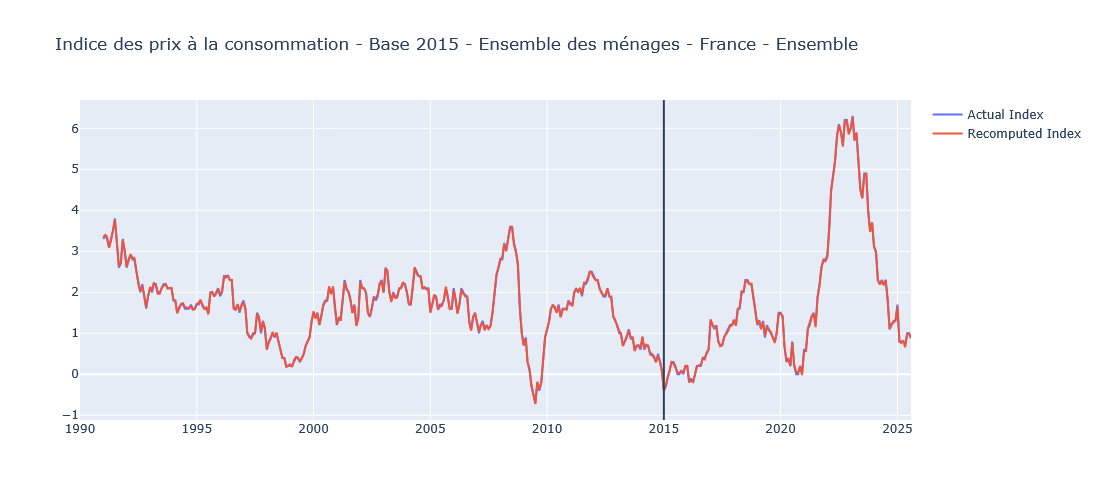

In [213]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.loc['Indice des prix à la consommation - Base 2015 - Glissement annuel - Ensemble des ménages - France - Ensemble'].index,  
                         y = df.loc['Indice des prix à la consommation - Base 2015 - Glissement annuel - Ensemble des ménages - France - Ensemble'],
                         name='Actual Index'
                        )
             )

fig.add_trace(go.Scatter(x = serie_ipc_YoY_change.index,  
                         y = serie_ipc_YoY_change,
                         name='Recomputed Index'
                        )
             )

fig.update_layout(width=1000, height=500, 
                  title=' Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble',
                  
                 )

fig.add_vline('2015-01')

fig.show()

Q : Now we would like to understand how the annual inflation rate is computed. Is it the YoY percentage change from Dec to Dec, is it the yearly mean of the YoY percetage change of index of prices, else ? 

A : When we say that the inflation rate was 2% in 2024, it means that in average the YoY monthly percentage change in the prices was 2% for that year.

In [235]:
serie_ipc_YoY_change.loc[[f'2024-{i}' for i in month_ls]].mean()

np.float64(2.004628024902496)

So far in 2025 the mean percentage change in the prices YoY is 0.94%. In comparison for the same period [2024-01:2024-08], the average YoY percentage change was 2.39% a difference of 1.45 percentage points.

In [244]:
serie_ipc_YoY_change.loc[[f'2025-{i}' for i in month_ls[:8]]].mean(), serie_ipc_YoY_change.loc[[f'2024-{i}' for i in month_ls[:8]]].mean()

(np.float64(0.9409893811952591), np.float64(2.393191684175414))

Let's breifly recompute the index.

In [261]:
annual_inflation_rate = pd.Series([serie_ipc_YoY_change.loc[k].mean() for k in [[f'{j}-{i}' for i in month_ls] 
                                                                                for j in [i for i in range(1991, 2025)]]], 
                                  index = [i for i in range(1991, 2025)])

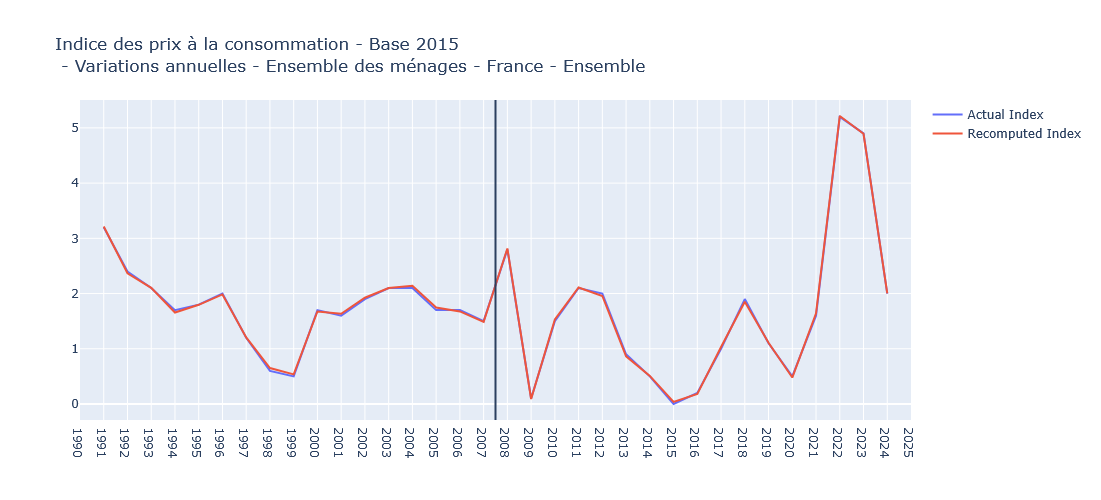

In [263]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_annual.loc['Indice des prix à la consommation - Base 2015 - Variations annuelles - Ensemble des ménages - France - Ensemble'].index,  
                         y = df_annual.loc['Indice des prix à la consommation - Base 2015 - Variations annuelles - Ensemble des ménages - France - Ensemble'],
                         name = 'Actual Index'
                        )
             )

fig.add_trace(go.Scatter(x = annual_inflation_rate.index,  
                         y = annual_inflation_rate,
                         name = 'Recomputed Index'
                        )
             )

fig.update_layout(width=1000, height=500, 
                  title='Indice des prix à la consommation - Base 2015<br> - Variations annuelles - Ensemble des ménages - France - Ensemble ',
                  
                 )

fig.add_vline('2015-01')

fig.show()

Superb, now it's clearer

It would be interesting to look at 4 points: 
- The breakdown of the prices index. Is there a bucket that drive the national inflation. Can we look at a regional breakdown as well ?
- To figure out the pros and cons of comparing the indexes in between countries (given presumably different baskets).
-  The relation in between the PIB and the inflation. We say that a bit of inflation is good, can we see it in the PIB or in another economic indicator ?
- The causal impact of Subprime crisis and Covid on the inflation rate. Investigating as well the decrease from 90 to 99 as well as the stable period from 00 to 08.